# Project on cardio vascular disease Prediction

# Import libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Loading Datasets

In [4]:
os.getcwd()

'C:\\Users\\91765\\Contacts'

In [5]:
df = pd.read_csv('Cardio_vascular.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
df.shape

(1025, 14)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# EXPlORATORY DATA ANALYSIS(EDA)

# Understanding the datasets

There are 14 attribute in the cardio vascular datasets.

1.age: age in years.
2.sex: sex (1 = male; 0 = female).
3.cp: chest pain type.
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
4.trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5.chol: serum cholestoral in mg/dl
6.fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7.restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.thalach: maximum heart rate achieved during stress Test
9.exang: exercise induced angina (1 = yes; 0 = no)
10.oldpeak = ST depression induced by exercise relative to rest
11.slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
12.ca: number of major vessels (0-4) colored by flourosopy
13.thal: 0 = null;1 = normal; 2 = fixed defect; 3 = reversable defect and the label
14.target: 0 = no disease, 1 = disease


Change the name of columns for better understanding :

In [8]:
df.rename(columns = {'sex':'gender','cp':'rest_cp','trestbps':'rest_bp','chol':'cholesterol','fbs':'fasting_bloodsugar',
                      'restecg':'rest_ecg','thalach':'stress_heartrate','exang':'exercise_cp','oldpeak':'Stdepression_exercise',
                      'slope':'STpeak_exercise','ca':'colored_vessels','thal':'thalassmia','target':'heart_disease'},
           inplace= True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1025 non-null   int64  
 1   gender                 1025 non-null   int64  
 2   rest_cp                1025 non-null   int64  
 3   rest_bp                1025 non-null   int64  
 4   cholesterol            1025 non-null   int64  
 5   fasting_bloodsugar     1025 non-null   int64  
 6   rest_ecg               1025 non-null   int64  
 7   stress_heartrate       1025 non-null   int64  
 8   exercise_cp            1025 non-null   int64  
 9   Stdepression_exercise  1025 non-null   float64
 10  STpeak_exercise        1025 non-null   int64  
 11  colored_vessels        1025 non-null   int64  
 12  thalassmia             1025 non-null   int64  
 13  heart_disease          1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Statistical Analysis of datasets

In [10]:
df.describe()

,age,gender,rest_cp,rest_bp,cholesterol,fasting_bloodsugar,rest_ecg,stress_heartrate,exercise_cp,Stdepression_exercise,STpeak_exercise,colored_vessels,thalassmia,heart_disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Number of Unique values in each Features

In [11]:
df.nunique()

age                       41
gender                     2
rest_cp                    4
rest_bp                   49
cholesterol              152
fasting_bloodsugar         2
rest_ecg                   3
stress_heartrate          91
exercise_cp                2
Stdepression_exercise     40
STpeak_exercise            3
colored_vessels            5
thalassmia                 4
heart_disease              2
dtype: int64

In [12]:
df.heart_disease.value_counts()

1    526
0    499
Name: heart_disease, dtype: int64

Here,526 persons are affected in heart disease and 499 are normal.so,It is a balance data.

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

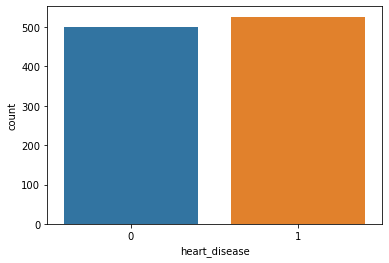

In [13]:
sns.countplot(x='heart_disease',data=df)

In [14]:
df['rest_cp'].value_counts()

0    497
2    284
1    167
3     77
Name: rest_cp, dtype: int64

rest_cp: chest pain type.
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic

<AxesSubplot:xlabel='rest_cp', ylabel='count'>

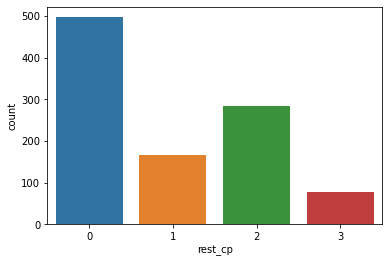

In [15]:
sns.countplot(x ='rest_cp',data=df)

[Text(0, 0.5, 'percentage')]

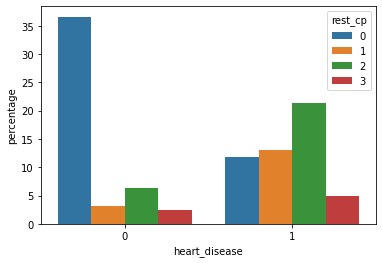

In [16]:
ax =sns.barplot(x='heart_disease',y='rest_cp',data=df,hue = 'rest_cp',estimator=lambda x:len(x)/len(df)*100)
ax.set(ylabel='percentage')

In [17]:
df['fasting_bloodsugar'].value_counts()

0    872
1    153
Name: fasting_bloodsugar, dtype: int64

fasting_bloodsugar: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

In [18]:
df['rest_ecg'].value_counts()

1    513
0    497
2     15
Name: rest_ecg, dtype: int64

res_tecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [19]:
df['exercise_cp'].value_counts()

0    680
1    345
Name: exercise_cp, dtype: int64

exercise_cp: exercise induced angina (1 = yes; 0 = no)

In [20]:
df['STpeak_exercise'].value_counts()

1    482
2    469
0     74
Name: STpeak_exercise, dtype: int64

STpeak_exercise: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping

In [21]:
df['colored_vessels'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: colored_vessels, dtype: int64

colored_vessels:number of major vessels (0-4) colored by flourosopy

In [22]:
df['thalassmia'].value_counts()

2    544
3    410
1     64
0      7
Name: thalassmia, dtype: int64

thalassmia:0 = null;1 = normal; 2 = fixed defect; 3 = reversable defect and the label

In [23]:
#deleting the null value of thalassmia
df=df[(df['thalassmia']>0)]

In [24]:
df['thalassmia'].value_counts()

2    544
3    410
1     64
Name: thalassmia, dtype: int64

In [25]:
df.describe()

,age,gender,rest_cp,rest_bp,cholesterol,fasting_bloodsugar,rest_ecg,stress_heartrate,exercise_cp,Stdepression_exercise,STpeak_exercise,colored_vessels,thalassmia,heart_disease
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,54.447937,0.696464,0.943026,131.636542,246.253438,0.146365,0.529470,149.187623,0.334971,1.074951,1.385069,0.759332,2.339882,0.513752
std,9.101835,0.460011,1.029886,17.574327,51.676406,0.353646,0.528086,23.006116,0.472212,1.177640,0.618506,1.032432,0.591982,0.500057
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.750000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'thalassmia v/s heart disease')

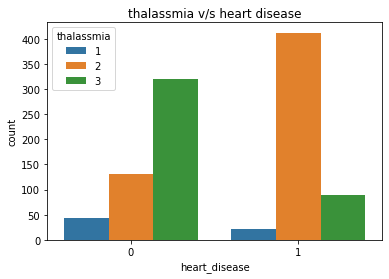

In [26]:
#how thalassmia relate to heart disease
sns.countplot(data= df,x = 'heart_disease',hue='thalassmia')
plt.title('thalassmia v/s heart disease')

Text(0.5, 1.0, 'gender v/s thalassmia')

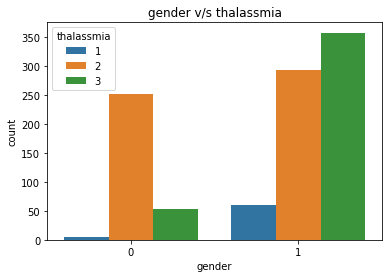

In [27]:
sns.countplot(x='gender',data =df,hue ='thalassmia')
plt.title('gender v/s thalassmia')

[Text(0.5, 0, 'gender of patient')]

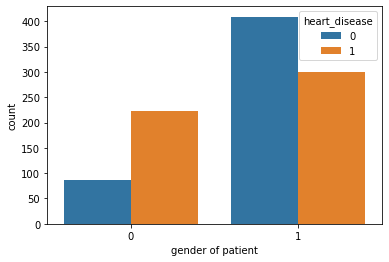

In [28]:
#plotting the graph of getting heart disease w.r.t gender
gender_count =sns.countplot(x ='gender',data=df,hue='heart_disease')
gender_count.set(xlabel='gender of patient')

In [29]:
df['gender'].value_counts()

1    709
0    309
Name: gender, dtype: int64

gender: 1 = male; 0 = female.
female has less chances of heart disease

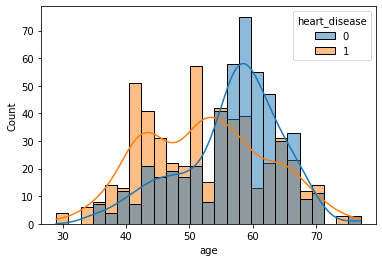

In [30]:
#plotting the histogram of getting heart disease  w.r.t age
sns.histplot(data=df,x ='age',hue='heart_disease',bins = 25,kde = True)
plt.show()

<AxesSubplot:xlabel='heart_disease', ylabel='age'>

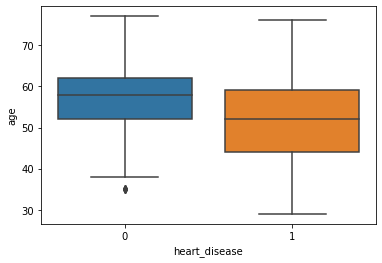

In [31]:
sns.boxplot(x='heart_disease',data=df,y ='age')


In [32]:
#missing values in the dtasets
df.isnull().sum()

age                      0
gender                   0
rest_cp                  0
rest_bp                  0
cholesterol              0
fasting_bloodsugar       0
rest_ecg                 0
stress_heartrate         0
exercise_cp              0
Stdepression_exercise    0
STpeak_exercise          0
colored_vessels          0
thalassmia               0
heart_disease            0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1018 non-null   int64  
 1   gender                 1018 non-null   int64  
 2   rest_cp                1018 non-null   int64  
 3   rest_bp                1018 non-null   int64  
 4   cholesterol            1018 non-null   int64  
 5   fasting_bloodsugar     1018 non-null   int64  
 6   rest_ecg               1018 non-null   int64  
 7   stress_heartrate       1018 non-null   int64  
 8   exercise_cp            1018 non-null   int64  
 9   Stdepression_exercise  1018 non-null   float64
 10  STpeak_exercise        1018 non-null   int64  
 11  colored_vessels        1018 non-null   int64  
 12  thalassmia             1018 non-null   int64  
 13  heart_disease          1018 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 151.6 KB


Every features are int of float type.therefore,we don't need any encoding.

# DATA PREPROCESSING

# 1.Outlier Treatment

There is no outlier present in given datasets.So,we don't need to treat outlier.

# 2.Missing Value Treatment

There are also no missing values in this datasets.

# 3.Extract thr target and predicted variable

In [34]:
#Extract Target Variable
X = df.drop(['heart_disease'],axis =1)
Y = df['heart_disease']

# 4.Feature Scaling

Now,We will scale the features using standardization.We  wil standardize the value between -3 to 3.

In [35]:
X.describe()

,age,gender,rest_cp,rest_bp,cholesterol,fasting_bloodsugar,rest_ecg,stress_heartrate,exercise_cp,Stdepression_exercise,STpeak_exercise,colored_vessels,thalassmia
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,54.447937,0.696464,0.943026,131.636542,246.253438,0.146365,0.529470,149.187623,0.334971,1.074951,1.385069,0.759332,2.339882
std,9.101835,0.460011,1.029886,17.574327,51.676406,0.353646,0.528086,23.006116,0.472212,1.177640,0.618506,1.032432,0.591982
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.750000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [36]:
from sklearn.preprocessing import StandardScaler
Scale_feature = StandardScaler()
X_scale=Scale_feature.fit_transform(X)
X_scale

array([[-0.26908204,  0.66017051, -0.91611061, ...,  0.99470897,
         1.20228531,  1.11564509],
       [-0.15916008,  0.66017051, -0.91611061, ..., -2.24047867,
        -0.73584049,  1.11564509],
       [ 1.70951317,  0.66017051, -0.91611061, ..., -2.24047867,
        -0.73584049,  1.11564509],
       ...,
       [-0.81869182,  0.66017051, -0.91611061, ..., -0.62288485,
         0.23322241, -0.57442441],
       [-0.48892595, -1.51476017, -0.91611061, ...,  0.99470897,
        -0.73584049, -0.57442441],
       [-0.04923813,  0.66017051, -0.91611061, ..., -0.62288485,
         0.23322241,  1.11564509]])

In [37]:
#The scaled value in array format .So,we convert it into dataframe .
X_scale_DF=pd.DataFrame(X_scale,index =X.index,columns =X.columns)
X_scale_DF

,age,gender,rest_cp,rest_bp,cholesterol,fasting_bloodsugar,rest_ecg,stress_heartrate,exercise_cp,Stdepression_exercise,STpeak_exercise,colored_vessels,thalassmia
0,-0.269082,0.660171,-0.916111,-0.377813,-0.663171,-0.414079,0.891449,0.818114,-0.709713,-0.063676,0.994709,1.202285,1.115645
1,-0.159160,0.660171,-0.916111,0.476125,-0.837417,2.414998,-1.003112,0.252769,1.409020,1.720428,-2.240479,-0.735840,1.115645
2,1.709513,0.660171,-0.916111,0.760770,-1.398877,-0.414079,0.891449,-1.051873,1.409020,1.295641,-2.240479,-0.735840,1.115645
3,0.720216,0.660171,-0.916111,0.931558,-0.837417,-0.414079,0.891449,0.513697,-0.709713,-0.913250,0.994709,0.233222,1.115645
4,0.830138,-1.514760,-0.916111,0.362266,0.924407,2.414998,0.891449,-1.878146,-0.709713,0.700940,-0.622885,2.171348,-0.574424
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.500372,0.660171,0.055348,0.476125,-0.488924,-0.414079,0.891449,0.644162,1.409020,-0.913250,0.994709,-0.735840,-0.574424
1021,0.610294,0.660171,-0.916111,-0.377813,0.227422,-0.414079,-1.003112,-0.356064,1.409020,1.465556,-0.622885,0.233222,1.115645
1022,-0.818692,0.660171,-0.916111,-1.231750,0.556554,-0.414079,-1.003112,-1.356289,1.409020,-0.063676,-0.622885,0.233222,-0.574424
1023,-0.488926,-1.514760,-0.916111,-1.231750,0.149979,-0.414079,-1.003112,0.426721,-0.709713,-0.913250,0.994709,-0.735840,-0.574424


# 5.Correlation

In [38]:
#now we will check the correlation between independent features.
X_scale_DF.corr()

,age,gender,rest_cp,rest_bp,cholesterol,fasting_bloodsugar,rest_ecg,stress_heartrate,exercise_cp,Stdepression_exercise,STpeak_exercise,colored_vessels,thalassmia
age,1.000000,-0.103705,-0.072695,0.270896,0.219127,0.125020,-0.132652,-0.392010,0.089739,0.207939,-0.169703,0.270985,0.070079
gender,-0.103705,1.000000,-0.034464,-0.079704,-0.199939,0.019504,-0.062310,-0.057143,0.133562,0.081243,-0.020783,0.111042,0.202289
rest_cp,-0.072695,-0.034464,1.000000,0.038187,-0.083220,0.090412,0.050097,0.314440,-0.397442,-0.172972,0.127094,-0.177516,-0.174645
rest_bp,0.270896,-0.079704,0.038187,1.000000,0.127212,0.185604,-0.124076,-0.040066,0.062197,0.187088,-0.120631,0.103722,0.056779
cholesterol,0.219127,-0.199939,-0.083220,0.127212,1.000000,0.034286,-0.146994,-0.023484,0.071103,0.063311,-0.014593,0.070920,0.086248
fasting_bloodsugar,0.125020,0.019504,0.090412,0.185604,0.034286,1.000000,-0.115258,-0.013651,0.035855,0.010465,-0.055631,0.145048,-0.012411
rest_ecg,-0.132652,-0.062310,0.050097,-0.124076,-0.146994,-0.115258,1.000000,0.043289,-0.073141,-0.052807,0.091662,-0.078055,-0.019490
stress_heartrate,-0.392010,-0.057143,0.314440,-0.040066,-0.023484,-0.013651,0.043289,1.000000,-0.388107,-0.355342,0.402621,-0.211336,-0.116161
exercise_cp,0.089739,0.133562,-0.397442,0.062197,0.071103,0.035855,-0.073141,-0.388107,1.000000,0.311099,-0.263637,0.111065,0.221954
Stdepression_exercise,0.207939,0.081243,-0.172972,0.187088,0.063311,0.010465,-0.052807,-0.355342,0.311099,1.000000,-0.574654,0.220350,0.201930


<AxesSubplot:>

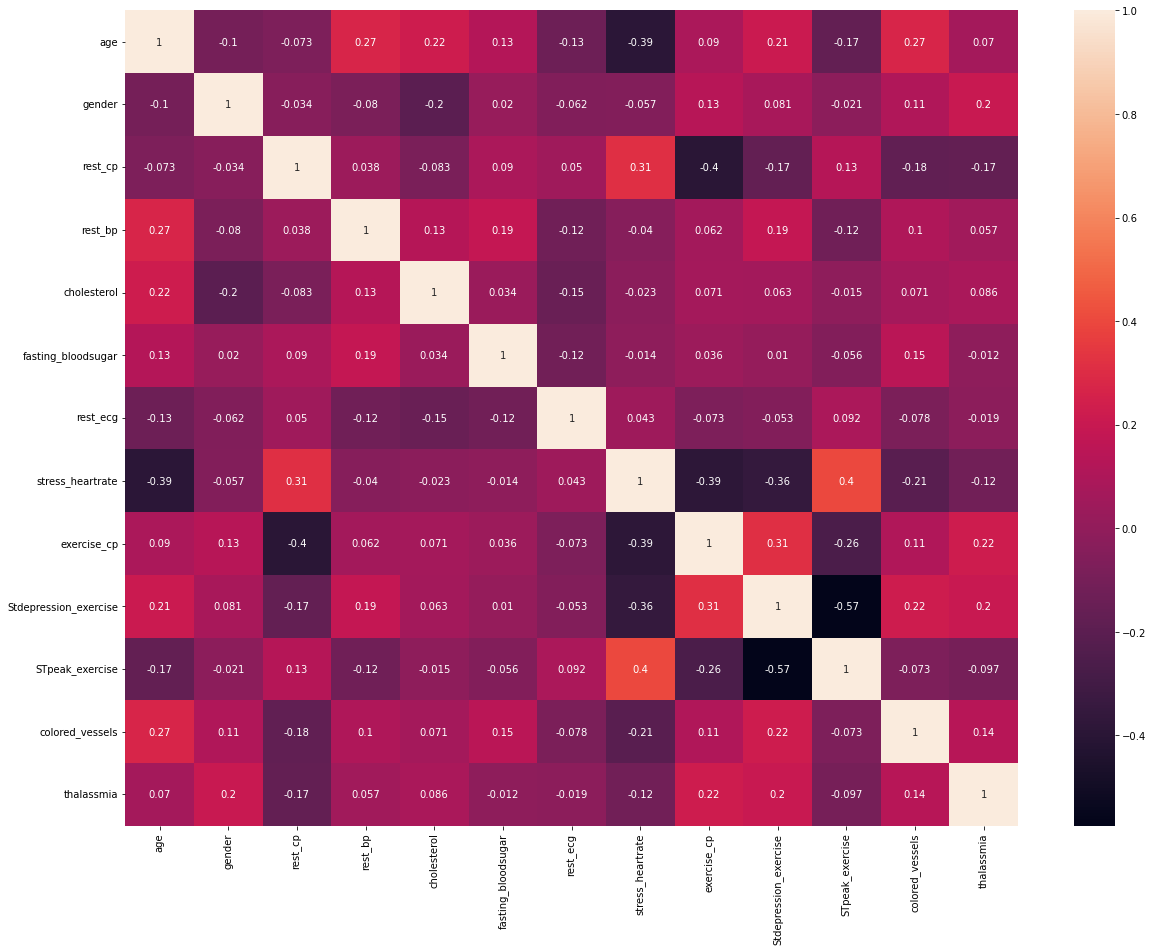

In [39]:
#we plot the heat map for better understanding.
plt.figure(figsize=(20,15))
sns.heatmap(X_scale_DF.corr(),annot =True)

Although there is no multicollinearity present,In clinical sector if the value is more than 0.8 than
we will consider it as multicollinearity .

# 6.Train & Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
print(X.shape)

(1018, 13)


In [42]:
print(Y.shape)

(1018,)


In [43]:
#splitting the train and test data of unscaled data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70,random_state=101)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(712, 13)
(712,)
(306, 13)
(306,)


In [50]:
#splitting the train and test data of scaled data
X_train1,X_test1,Y_train,Y_test=train_test_split(X_scale_DF,Y,train_size=0.70,random_state=101)
print(X_train1.shape)
print(X_test1.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 13)
(306, 13)
(712,)
(306,)


# Model Building

# 1.KNN Algorithm

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn5=KNeighborsClassifier(n_neighbors =5)
knn5.fit(X_train,Y_train)

KNeighborsClassifier()

In [52]:
#Predicting the model with unscaled data
Y_pred_KNN_train=knn5.predict(X_train)
Y_pred_KNN_test=knn5.predict(X_test)

In [53]:
#testing the accuracy of the model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [54]:
print('The knn model accuracy of training data is  ',accuracy_score(Y_train,Y_pred_KNN_train))
print('The knn model accuracy of testing data is  ',accuracy_score(Y_test,Y_pred_KNN_test))

The knn model accuracy of training data is   0.8806179775280899
The knn model accuracy of testing data is   0.7058823529411765


From above result ,it is clearly showing that is the difference between training and testing score is more than 10.
So,it is considered as overfitting problem.

In [55]:
#fitting the model with scaled data
knn5_scale=KNeighborsClassifier(n_neighbors =5)
knn5_scale.fit(X_train1,Y_train)

KNeighborsClassifier()

In [56]:
#predicting the model
Y_pred_KNN_train1=knn5_scale.predict(X_train1)
Y_pred_KNN_test1=knn5_scale.predict(X_test1)

In [57]:
#evaluating the accuracy of the model
print('The knn model accuracy of training data is  ',accuracy_score(Y_train,Y_pred_KNN_train1))
print('The knn model accuracy of testing data is  ',accuracy_score(Y_test,Y_pred_KNN_test1))

The knn model accuracy of training data is   0.9508426966292135
The knn model accuracy of testing data is   0.8660130718954249


In [58]:
#finding the more accurate value of n_neighbors
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

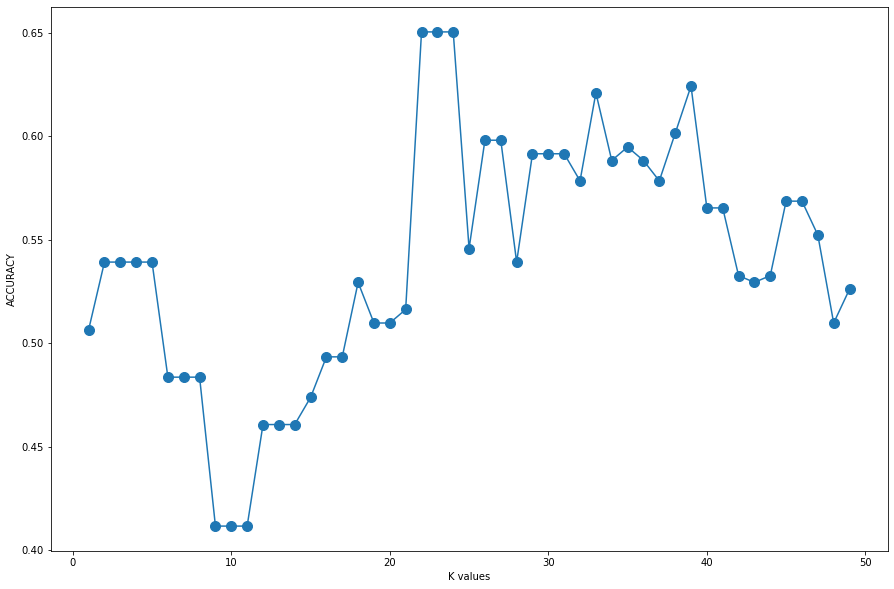

In [59]:
accuracy_k=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1,Y_train)
    Y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_pred,Y_test)
    accuracy_k.append(accuracy)

    
plt.figure(figsize=(15,10))
plt.xlabel('K values')
plt.ylabel('ACCURACY')
plt.plot(range(1,50),accuracy_k,marker='o',markersize=10)

In [60]:
#Checking the value between 23 or 25
knn_23 =KNeighborsClassifier(n_neighbors =23)
knn_23.fit(X_train1,Y_train)

Y_pred_KNN_train1=knn_23.predict(X_train1)
Y_pred_KNN_test1=knn_23.predict(X_test1)

In [61]:
print('The knn model accuracy of training data is  ',accuracy_score(Y_train,Y_pred_KNN_train1))
print('The knn model accuracy of testing data is  ',accuracy_score(Y_test,Y_pred_KNN_test1))

The knn model accuracy of training data is   0.8553370786516854
The knn model accuracy of testing data is   0.8202614379084967


# Cross Validation(CV)

In [62]:
#we use cross validation for improving model accuracy
from sklearn.model_selection import cross_val_score

In [63]:
accuracy_training = cross_val_score(knn_23,X_train1,Y_train,cv=15)
accuracy_testing = cross_val_score(knn_23,X_test1,Y_test,cv=15)
print(accuracy_training)
print(accuracy_testing)

[0.8125     0.89583333 0.85416667 0.85416667 0.89583333 0.91666667
 0.9375     0.93617021 0.87234043 0.85106383 0.78723404 0.78723404
 0.80851064 0.72340426 0.87234043]
[0.95238095 0.85714286 0.76190476 0.9047619  0.57142857 0.80952381
 0.75       0.9        0.9        0.85       0.65       0.85
 0.7        0.7        0.7       ]


All time accuracy does not give the accurate value .so,we check our model through confusion matrix.

In [64]:
#confusion matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
knn_conf_matx=confusion_matrix(Y_pred_KNN_test1,Y_test)
print(knn_conf_matx)

[[113  20]
 [ 35 138]]


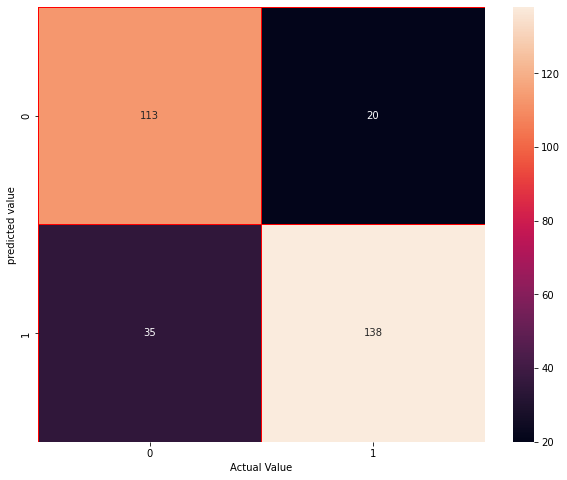

In [65]:
#visualization of confusion matrix
plt.subplots(figsize =(10,8))
sns.heatmap(knn_conf_matx,annot=True,data =X,linecolor='red',linewidths=0.5,fmt ='.0f')
plt.xlabel('Actual Value')
plt.ylabel('predicted value')
plt.show()

True positive =113(Top left corner)
False positive =20(top right corner)
False negative =35(below True positive)
True negative=138(below False positive)

In [66]:
#classification report is another version of finding accuracy.
print('Classifiaction report of KNN training model ',classification_report(Y_pred_KNN_train1,Y_train))
print('Classifiaction report of KNN testing model ',classification_report(Y_pred_KNN_test1,Y_test))

Classifiaction report of KNN training model                precision    recall  f1-score   support

           0       0.80      0.89      0.84       312
           1       0.91      0.83      0.87       400

    accuracy                           0.86       712
   macro avg       0.85      0.86      0.85       712
weighted avg       0.86      0.86      0.86       712

Classifiaction report of KNN testing model                precision    recall  f1-score   support

           0       0.76      0.85      0.80       133
           1       0.87      0.80      0.83       173

    accuracy                           0.82       306
   macro avg       0.82      0.82      0.82       306
weighted avg       0.83      0.82      0.82       306



HERE
Precision is  defined as the number of correct outputs provided by the model or out of all positive classe that
have predicted correctly by the model, how many of them were actually true. 
PREcision =TP/(TP+FP)

Recall can be defined as the out of total positive classes, how our model predicted correctly.
Recall =TP/(TP+FN)

F1 SCore :If two models have low precision and high recall or vice versa, it is difficult to compare these models. 
    So, for this purpose, we can use F-score. This score helps us to evaluate the recall and precision at the same time. 
    The F-score is maximum if the recall is equal to the precision. It can be calculated using the below formula:
F1 SCORE =2*recall*precision/(recall + precision)

Hence,the difference of accuracy between train and test data is 4 .so,it is considered as good model.

# KNN ROC AUC PREDICTION

In [69]:
from sklearn.metrics import roc_auc_score
prediction_probability_positive = knn.predict_proba(X_test1)[:,1]
auc_score1=roc_auc_score(Y_test,prediction_probability_positive)

from sklearn.metrics import roc_curve
fpr1,tpr1,thresh1 = roc_curve(Y_test,prediction_probability_positive,pos_label =1)

print('AUc Score',auc_score1)


AUc Score 0.913274033527198


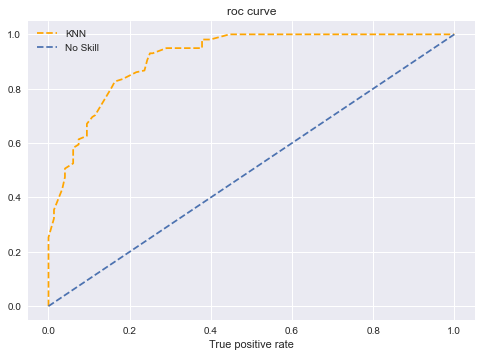

In [71]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#plot roc curve
plt.plot(fpr1,tpr1,linestyle ='--',color = 'orange',label ='KNN')
#plot no skill roc curve
plt.plot([0,1],[0,1],linestyle ='--',label='No Skill')
plt.title('roc curve')
plt.xlabel('False positive rate')
plt.xlabel('True positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi =300)
plt.show()

"Roc Curve":The ROC is a graph displaying a classifier's performance for all possible thresholds.
    The graph is plotted between the true positive rate (on the X-axis) and the false Positive rate (on the Y-axis).


# 2.Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [74]:
Y_pred_lr_train =lr.predict(X_train1)
Y_pred_lr_test =lr.predict(X_test1)

In [75]:
print('Logistic redression training accuracy :',accuracy_score(Y_train,Y_pred_lr_train))
print('Logistic redression testing accuracy :',accuracy_score(Y_test,Y_pred_lr_test))

Logistic redression training accuracy : 0.8160112359550562
Logistic redression testing accuracy : 0.803921568627451


# Confusion Matrix


[[116  32]
 [ 28 130]]


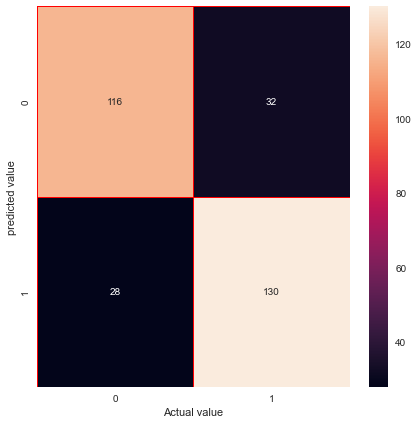

In [76]:
lr_conf_matrix=confusion_matrix(Y_test,Y_pred_lr_test)
print(lr_conf_matrix)

#visualize confusion matrix
plt.subplots(figsize=(7,7))
sns.heatmap(lr_conf_matrix,annot =True,linewidths =0.5,linecolor ='red',fmt ='.0f',data =X_test)
plt.xlabel('Actual value')
plt.ylabel('predicted value')
plt.show()

In [77]:
print('classification report of training model :',classification_report(Y_train,Y_pred_lr_train))
print('classification report of testing model :',classification_report(Y_test,Y_pred_lr_test))

classification report of training model :               precision    recall  f1-score   support

           0       0.84      0.76      0.80       347
           1       0.79      0.87      0.83       365

    accuracy                           0.82       712
   macro avg       0.82      0.81      0.82       712
weighted avg       0.82      0.82      0.82       712

classification report of testing model :               precision    recall  f1-score   support

           0       0.81      0.78      0.79       148
           1       0.80      0.82      0.81       158

    accuracy                           0.80       306
   macro avg       0.80      0.80      0.80       306
weighted avg       0.80      0.80      0.80       306



# 3.Support Vector Machine(SVM)

In [79]:
from sklearn.svm import SVC
svc_model=SVC(C =.1,kernel ='linear',gamma =1)
svc_model.fit(X_train1,Y_train)
Y_pred_SVM_train =svc_model.predict(X_train1)
Y_pred_SVM_test =svc_model.predict(X_test1)
print('training accuracy :',svc_model.score(X_train1,Y_train))
print('testing accuracy :',svc_model.score(X_test1,Y_test))

training accuracy : 0.8665730337078652
testing accuracy : 0.8464052287581699


[[121  27]
 [ 20 138]]


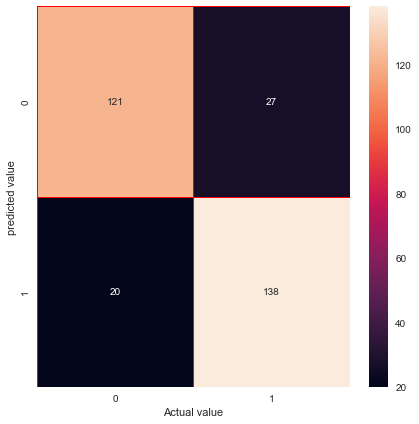

In [80]:
#confusion matrix
svm_conf_matrix =confusion_matrix(Y_test,Y_pred_SVM_test)
print(svm_conf_matrix)
#visualize confusion matrix
plt.subplots(figsize=(7,7))
sns.heatmap(svm_conf_matrix,annot =True,linewidths =0.5,linecolor ='red',fmt ='.0f',data =X_test)
plt.xlabel('Actual value')
plt.ylabel('predicted value')
plt.show()

In [81]:
print('classification report of training data of SVM :',classification_report(Y_train,Y_pred_SVM_train))
print('classification report of testing data of SVM :',classification_report(Y_test,Y_pred_SVM_test))

classification report of training data of SVM :               precision    recall  f1-score   support

           0       0.88      0.84      0.86       347
           1       0.85      0.89      0.87       365

    accuracy                           0.87       712
   macro avg       0.87      0.87      0.87       712
weighted avg       0.87      0.87      0.87       712

classification report of testing data of SVM :               precision    recall  f1-score   support

           0       0.86      0.82      0.84       148
           1       0.84      0.87      0.85       158

    accuracy                           0.85       306
   macro avg       0.85      0.85      0.85       306
weighted avg       0.85      0.85      0.85       306



# 4.Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier(criterion ='entropy')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [85]:
Y_pred_dt_train=dt.predict(X_train)
Y_pred_dt_test=dt.predict(X_test)

In [86]:
print('decision Tree classifier training accuracy :',accuracy_score(Y_train,Y_pred_dt_train))
print('decision Tree classifier testing accuracy :',accuracy_score(Y_test,Y_pred_dt_test))

decision Tree classifier training accuracy : 1.0
decision Tree classifier testing accuracy : 0.9607843137254902


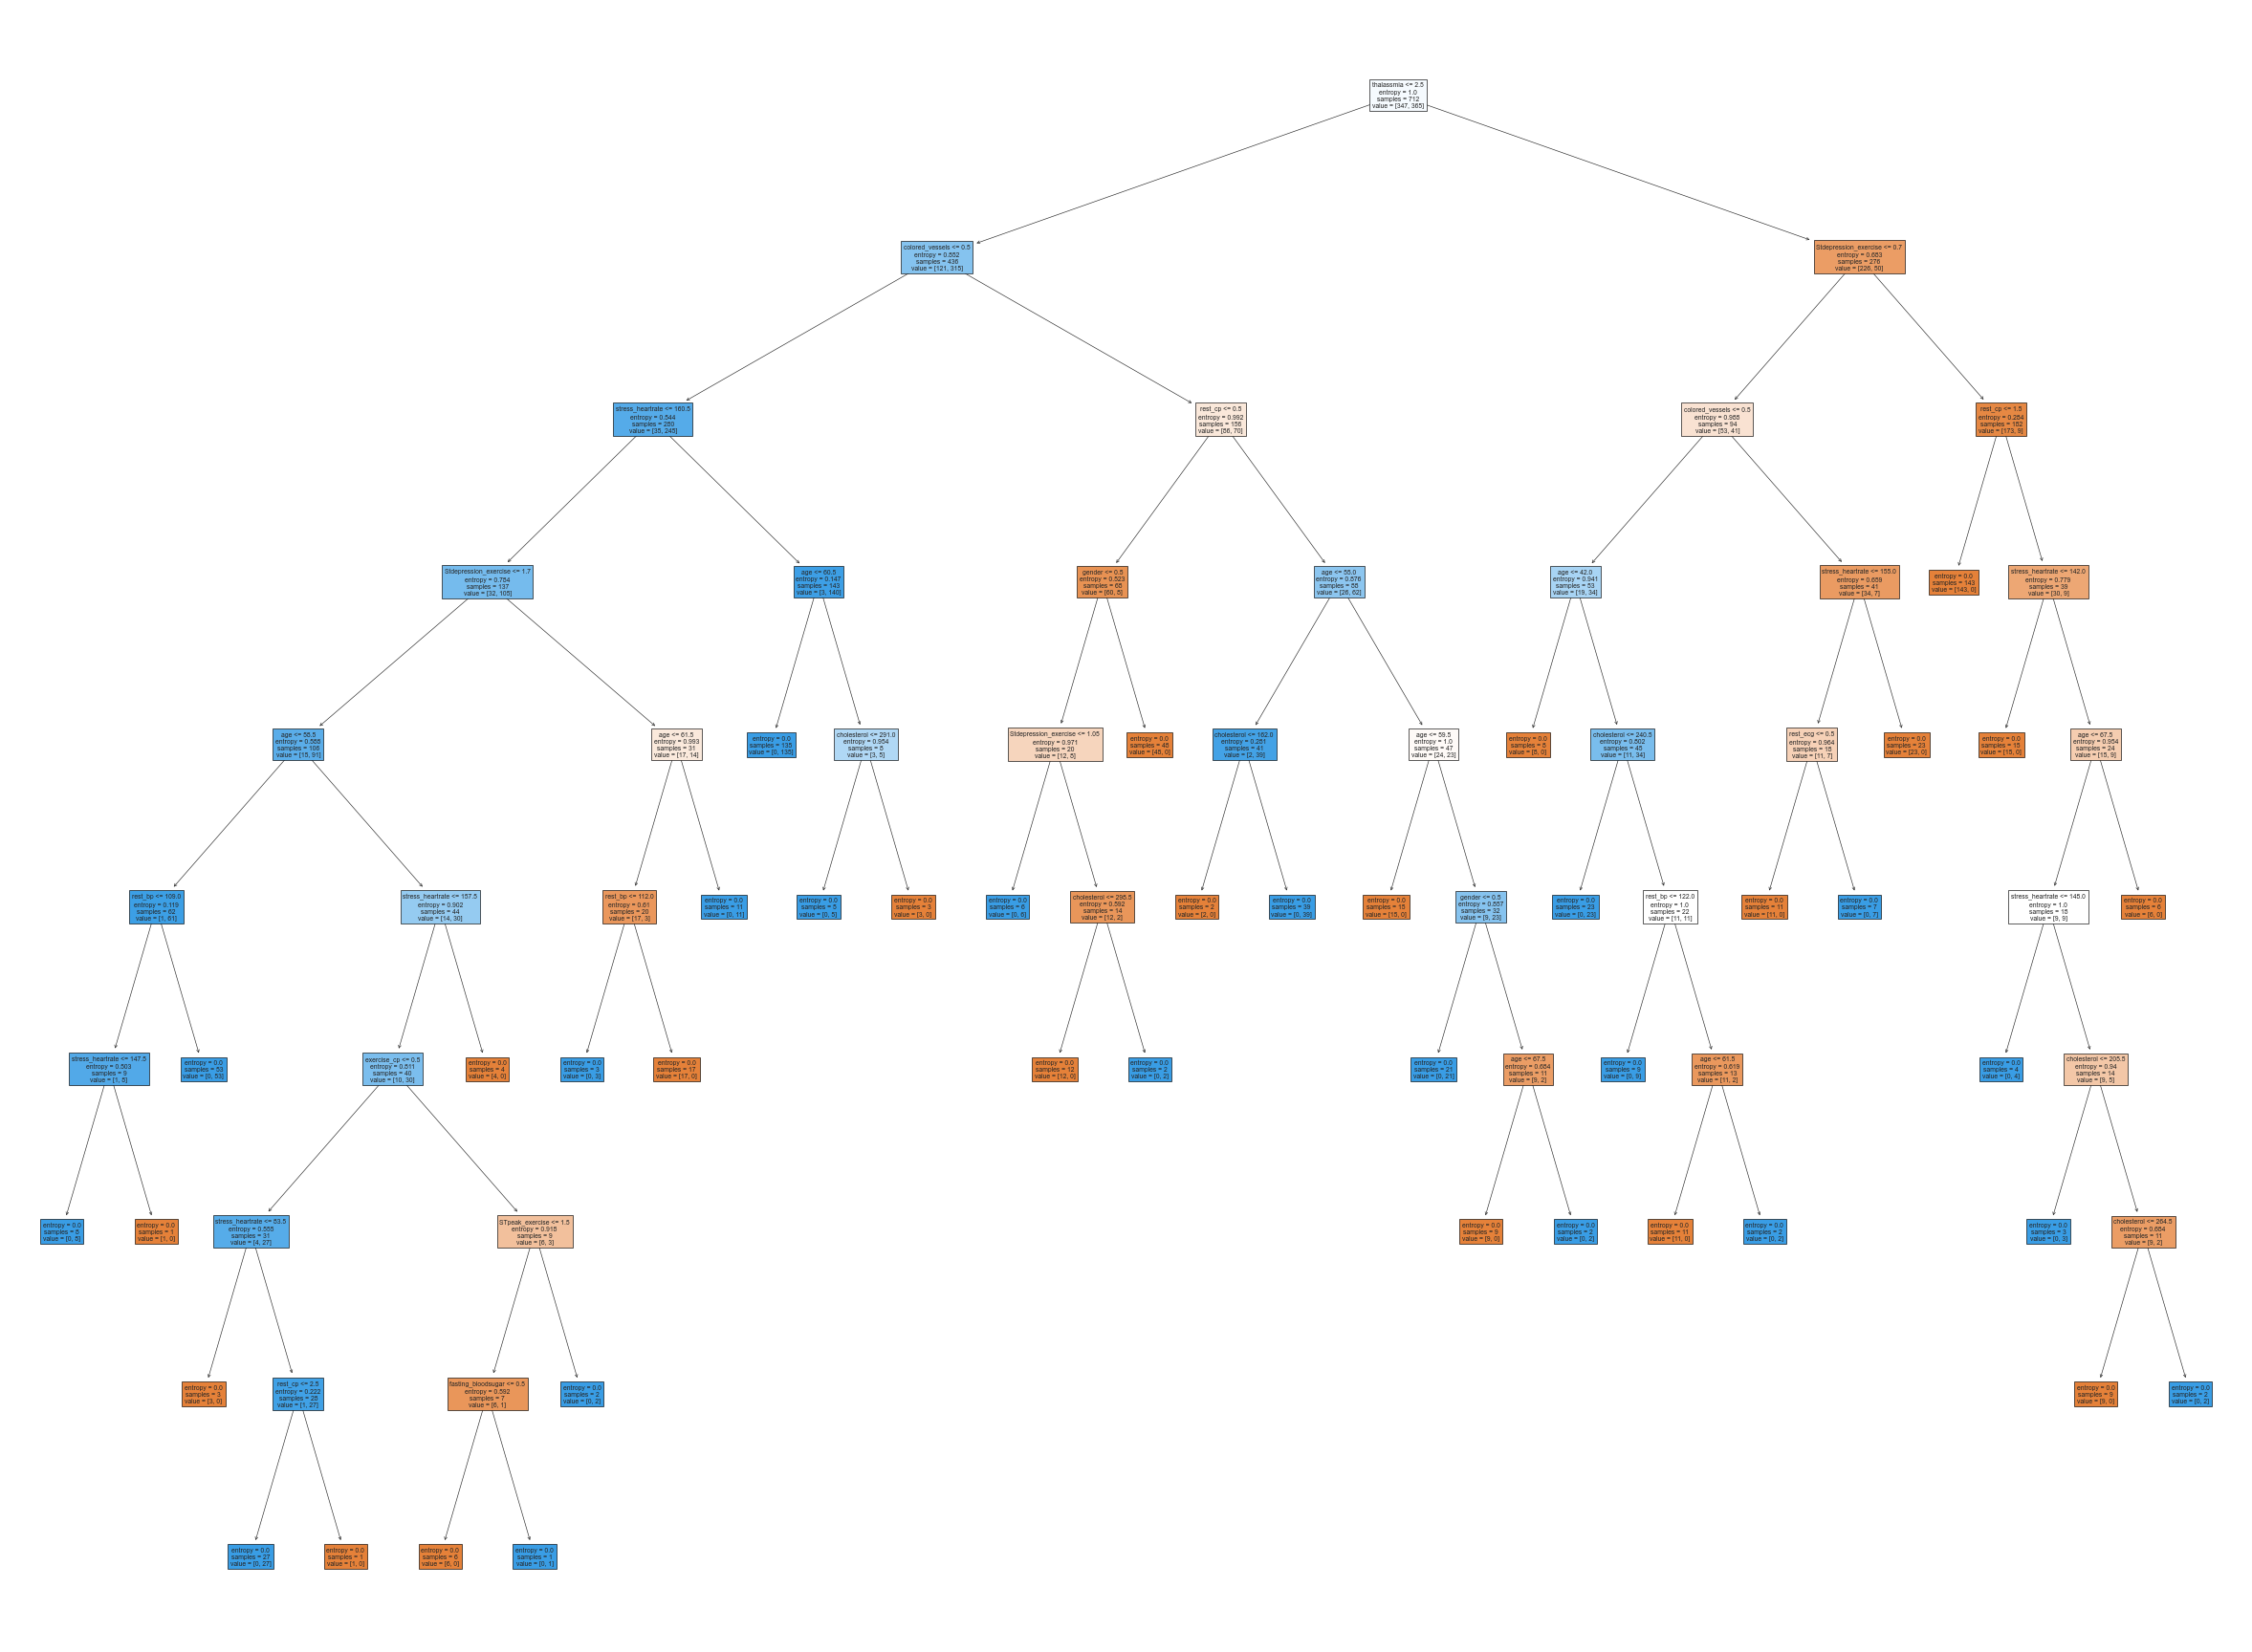

In [87]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15),dpi = 150)
plot_tree(dt,filled =True,feature_names=X.columns)
plt.show()

[[148   0]
 [ 12 146]]


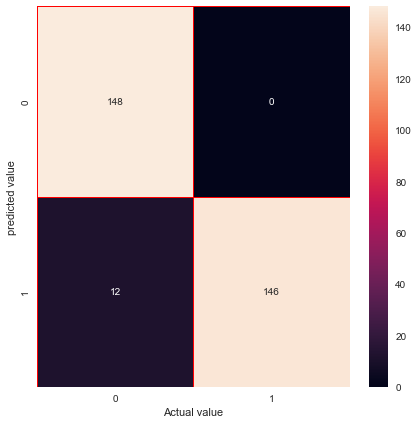

In [88]:
#confusion Matrix
dt_conf_matrix =confusion_matrix(Y_test,Y_pred_dt_test)
print(dt_conf_matrix)
#visuLIZE THE CONFUSION MATRIX
plt.subplots(figsize=(7,7))
sns.heatmap(dt_conf_matrix,annot =True,linewidths =0.5,linecolor ='red',fmt ='.0f',data =X_test)
plt.xlabel('Actual value')
plt.ylabel('predicted value')
plt.show()

In [89]:
print('classification report of training data of decision tree :',classification_report(Y_train,Y_pred_dt_train))
print('classification report of testing data of decision tree :',classification_report(Y_test,Y_pred_dt_test))

classification report of training data of decision tree :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       365

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

classification report of testing data of decision tree :               precision    recall  f1-score   support

           0       0.93      1.00      0.96       148
           1       1.00      0.92      0.96       158

    accuracy                           0.96       306
   macro avg       0.96      0.96      0.96       306
weighted avg       0.96      0.96      0.96       306



In [90]:
from sklearn.metrics import roc_auc_score
prediction_probability_positive_dt = dt.predict_proba(X_test1)[:,1]
auc_score1_dt=roc_auc_score(Y_test,prediction_probability_positive_dt)

from sklearn.metrics import roc_curve
fpr1_dt,tpr1_dt,thresh1_dt=roc_curve(Y_test,prediction_probability_positive_dt,pos_label =1)
print('AUC SCORE :',auc_score1_dt)

AUC SCORE : 0.6172169004447485


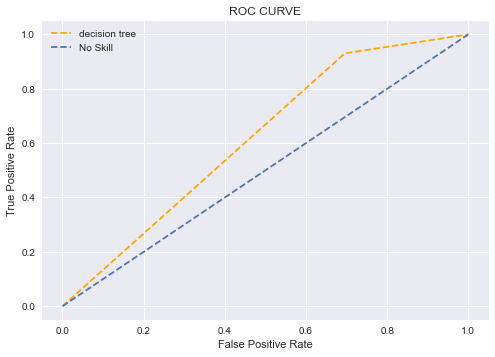

In [93]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(fpr1_dt,tpr1_dt,linestyle ='--',color ='orange',label ='decision tree')
plt.plot([0,1],[0,1],linestyle ='--',label='No Skill')
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi =300)
plt.show()

# Feature Importance

In [94]:
dt.feature_importances_

array([0.16804725, 0.05061231, 0.09800825, 0.04075012, 0.07688622,
       0.00581969, 0.02438402, 0.09627923, 0.00981961, 0.09729487,
       0.00579334, 0.11303706, 0.21326804])

In [95]:
pd.DataFrame(index =X.columns,data =dt.feature_importances_,columns =['Feature Importance'])

,Feature Importance
age,0.168047
gender,0.050612
rest_cp,0.098008
rest_bp,0.040750
cholesterol,0.076886
fasting_bloodsugar,0.005820
rest_ecg,0.024384
stress_heartrate,0.096279
exercise_cp,0.009820
Stdepression_exercise,0.097295


# 5.Bagging Model

Bagging model can reduce the variance without affecting of Bias.
We use bagging model when we have low Bias and high Variance.

In [97]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(X_train,Y_train)

BaggingClassifier()

In [98]:
Y_pred_BM_train =bagging.predict(X_train)
Y_pred_BM_test =bagging.predict(X_test)

In [99]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [100]:
print('Bagging model training accuracy :',accuracy_score(Y_train,Y_pred_BM_train))
print('Bagging model testing accuracy :',accuracy_score(Y_test,Y_pred_BM_test))

Bagging model training accuracy : 1.0
Bagging model testing accuracy : 0.9607843137254902


In [101]:
print('classification report on training accuracy :',classification_report(Y_train,Y_pred_BM_train))
print('classification report on testing accuracy :',classification_report(Y_test,Y_pred_BM_test))

classification report on training accuracy :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       365

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

classification report on testing accuracy :               precision    recall  f1-score   support

           0       0.93      1.00      0.96       148
           1       1.00      0.92      0.96       158

    accuracy                           0.96       306
   macro avg       0.96      0.96      0.96       306
weighted avg       0.96      0.96      0.96       306



In [102]:
#confusion matrix
BM_conf_matrix =confusion_matrix(Y_test,Y_pred_BM_test)
print(BM_conf_matrix)
print('confusion matrix of training dataset :',confusion_matrix(Y_train,Y_pred_BM_train))

[[148   0]
 [ 12 146]]
confusion matrix of training dataset : [[347   0]
 [  0 365]]


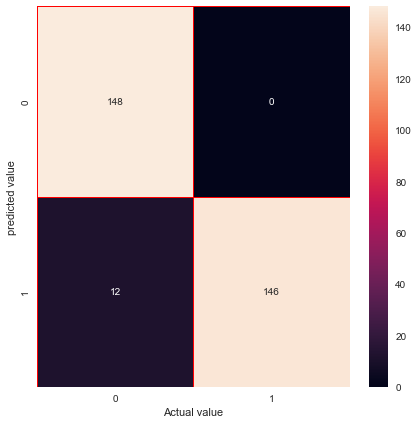

In [103]:
#visualize the confusion matrix
plt.subplots(figsize=(7,7))
sns.heatmap(BM_conf_matrix,annot =True,linewidths =0.5,linecolor ='red',fmt ='.0f',data =X_test)
plt.xlabel('Actual value')
plt.ylabel('predicted value')
plt.show()

# 6.Random Forest Method

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators = 50,criterion='entropy')
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [105]:
Y_pred_rf_train=rf.predict(X_train)
Y_pred_rf_test=rf.predict(X_test)

In [106]:
print("Random Forest training accuracy :",accuracy_score(Y_train,Y_pred_rf_train))
print("Random Forest testing accuracy :",accuracy_score(Y_test,Y_pred_rf_test))

Random Forest training accuracy : 1.0
Random Forest testing accuracy : 0.9705882352941176


In [109]:
#confusion matrix
rf_conf_matrix=confusion_matrix(Y_test,Y_pred_rf_test)
print(rf_conf_matrix)

[[148   0]
 [  9 149]]


In [110]:
print(confusion_matrix(Y_train,Y_pred_rf_train))

[[347   0]
 [  0 365]]


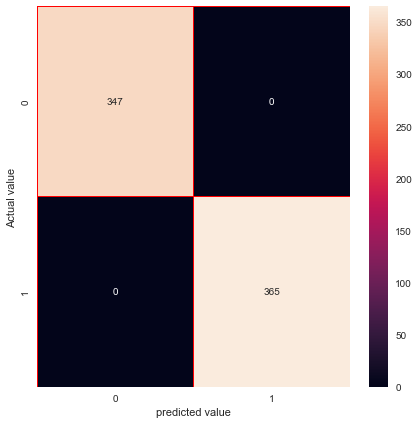

In [111]:
plt.subplots(figsize=(7,7))
sns.heatmap(rf_conf_matrix,annot =True,linewidths =0.5,linecolor ='red',fmt ='.0f',data =X_test)
plt.ylabel('Actual value')
plt.xlabel('predicted value')
plt.show()

In [112]:
print('classification report of training dataset :',classification_report(Y_train,Y_pred_rf_train))
print('classification report of testing dataset :',classification_report(Y_test,Y_pred_rf_test))

classification report of training dataset :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       365

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

classification report of testing dataset :               precision    recall  f1-score   support

           0       0.94      1.00      0.97       148
           1       1.00      0.94      0.97       158

    accuracy                           0.97       306
   macro avg       0.97      0.97      0.97       306
weighted avg       0.97      0.97      0.97       306



In [114]:
#get feature importance
importance=rf.feature_importances_
#summerize future importance
for i,v in enumerate(importance):
    print('feature = %0d,Score =%.5f' % (i,v))
    print(importance)

feature = 0,Score =0.10542
[0.1054234  0.04671483 0.11481684 0.07956706 0.0808765  0.0096805
 0.02141721 0.10885729 0.03943284 0.11252654 0.04983639 0.10678556
 0.12406504]
feature = 1,Score =0.04671
[0.1054234  0.04671483 0.11481684 0.07956706 0.0808765  0.0096805
 0.02141721 0.10885729 0.03943284 0.11252654 0.04983639 0.10678556
 0.12406504]
feature = 2,Score =0.11482
[0.1054234  0.04671483 0.11481684 0.07956706 0.0808765  0.0096805
 0.02141721 0.10885729 0.03943284 0.11252654 0.04983639 0.10678556
 0.12406504]
feature = 3,Score =0.07957
[0.1054234  0.04671483 0.11481684 0.07956706 0.0808765  0.0096805
 0.02141721 0.10885729 0.03943284 0.11252654 0.04983639 0.10678556
 0.12406504]
feature = 4,Score =0.08088
[0.1054234  0.04671483 0.11481684 0.07956706 0.0808765  0.0096805
 0.02141721 0.10885729 0.03943284 0.11252654 0.04983639 0.10678556
 0.12406504]
feature = 5,Score =0.00968
[0.1054234  0.04671483 0.11481684 0.07956706 0.0808765  0.0096805
 0.02141721 0.10885729 0.03943284 0.112526

In [115]:
print('feature = %0d,Score =%.5f' % (i,v))


feature = 12,Score =0.12407


In [116]:
from matplotlib import pyplot

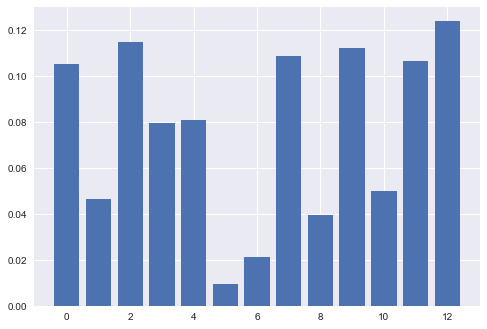

In [118]:
#plot feature importance
pyplot.bar([x for x in range(len(importance))],importance)
pyplot.show()

[0.07257519 0.05378605 0.11859127 0.05927486 0.05894417 0.02161408
 0.03528987 0.08256881 0.09908252 0.09057244 0.06482946 0.12062226
 0.12224902]


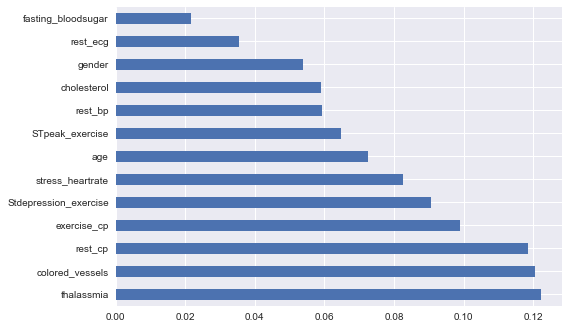

In [119]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index =X.columns)
feat_importance.nlargest(13).plot(kind ='barh')
plt.show()

# Random Forest(Criterion =GINI)

In [120]:
rf1=RandomForestClassifier(n_estimators = 200,criterion='gini')
rf1.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [121]:
Y_pred_rf_gini_train=rf1.predict(X_train)
Y_pred_rf_gini_test=rf1.predict(X_test)

In [122]:
print('Random forest ginni training accuracy :',accuracy_score(Y_train,Y_pred_rf_gini_train))
print('Random forest ginni testing accuracy :',accuracy_score(Y_test,Y_pred_rf_gini_test))

Random forest ginni training accuracy : 1.0
Random forest ginni testing accuracy : 0.9803921568627451


# 7.Gaussian Naive Bayes 

In [123]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [124]:
Y_pred_gnb_train=gnb.predict(X_train)
Y_pred_gnb_test=gnb.predict(X_test)

In [128]:
from sklearn import metrics
print('Gaussian Naive Bayes model accuracy(in %) :',metrics.accuracy_score(Y_test,Y_pred_gnb_test)*100)

Gaussian Naive Bayes model accuracy(in %) : 83.00653594771242


In [129]:
print('Gaussian Naive Bayes Training accuracy :',accuracy_score(Y_train,Y_pred_gnb_train))
print('Gaussian Naive Bayes Testing accuracy :',accuracy_score(Y_test,Y_pred_gnb_test))

Gaussian Naive Bayes Training accuracy : 0.8609550561797753
Gaussian Naive Bayes Testing accuracy : 0.8300653594771242


# Conclusion

The project involved analysis of the cardio vacular disease patient dataset with proper data processing.
Then, 7 models were trained and tested with maximum scores as follows:
KNN Classifier :0.86(train),0.82(test)
Logistic Regression :0.82(train),0.79(test)
SVM:0.87(train),0.85(test)
Decision Tree:1.0(train),0.96(test)
Bagging Method :1.0(train),0.96(test)
Random Forest:1.0(train),0.98(test)
Guassian Naive Bayes:0.86(train),0.83(test)